In [1]:
import pandas as pd
import numpy as np
import matplotlib 

In [2]:
#df = pd.read_csv(r"C:\Users\simbi\Ironhack\Proyecto\datos_proyecto\attacks.csv", encoding ="unicode_escape")

df = pd.read_csv(r"C:\Users\nuc_humbertore\Ironhack\primer_proyecto_DAPT\datos_proyecto\attacks.csv", encoding ="unicode_escape")


# 1 Revisión inicial del DF

In [3]:
print(f"{df.shape = }")
print("\n")
print(f"{df.describe()}")
print("\n")
print(f"{df.info()}")

df.shape = (25723, 24)


              Year  original order
count  6300.000000     6309.000000
mean   1927.272381     3155.999683
std     281.116308     1821.396206
min       0.000000        2.000000
25%    1942.000000     1579.000000
50%    1977.000000     3156.000000
75%    2005.000000     4733.000000
max    2018.000000     6310.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name          

In [4]:
df.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

# Limpieza de los datos
## 2.2 filas

In [5]:
#Tomamos la columna "Case Number" como base 
#y eliminamos del DF todas las filas que tengan NaN en esta columna

df.dropna(subset=["Case Number"], inplace=True)

In [6]:
#Borramos las filas con valor 0 de Case Number

indexNames = df[ df["Case Number"] == '0' ].index
# Eliminar estos índices de fila del dataFrame
df.drop(indexNames , inplace=True)

In [7]:
print(f"{df.shape = }")
print("\n")
print(f"{df.info()}")

df.shape = (6302, 24)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6302 non-null   object 
 1   Date                    6301 non-null   object 
 2   Year                    6299 non-null   float64
 3   Type                    6297 non-null   object 
 4   Country                 6251 non-null   object 
 5   Area                    5846 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5757 non-null   object 
 8   Name                    6091 non-null   object 
 9   Sex                     5736 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6273 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species        

In [8]:
# para comprobar cuantos nulos hay por fila y listar los 10 que tienen más

nulos = df.isnull().sum(axis=1)
nulos.sort_values(ascending = False).head(10)

25722    23
5036     10
6165     10
6122     10
4976     10
6130     10
6080     10
6108     10
3378      9
5029      9
dtype: int64

In [9]:
#borramos los filas con menos de 10 valores que no son Null

df.dropna(thresh=10, inplace=True)

In [10]:
df.tail(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [11]:
print(f"{df.shape = }")
print(df.info())

df.shape = (6301, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6301 non-null   object 
 2   Year                    6299 non-null   float64
 3   Type                    6297 non-null   object 
 4   Country                 6251 non-null   object 
 5   Area                    5846 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5757 non-null   object 
 8   Name                    6091 non-null   object 
 9   Sex                     5736 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6273 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species           

# Limpieza de los datos
## 2.2 Columnas

In [12]:
df.sample(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4616,1945.09.19,19-Sep-1945,1945.0,Sea Disaster,OKINAWA,NaN,NaN,American minesweeper USS YMS-472 foundered in ...,Lowell J. Bemis,M,...,NaN,"Mid-Pacific Stars & Stripes, 10/22/1945",1945.09.19-Bemis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1945.09.19,1945.09.19,1687.0,NaN,NaN
5589,1898.08.22,22-Aug-1898,1898.0,Unprovoked,USA,New York,"Prince's Bay, Staten Island",Swimming,Charles E. Boone,M,...,NaN,"Lima News, 9/27/1898",1898.08.22-Boone.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1898.08.22,1898.08.22,714.0,NaN,NaN


In [13]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [14]:
#Después de una exploración del df borramos las columnas
#con datos no numéricos y que no se pueden categorizar 
#P. ej.enlaces y códigos repetidos y columnas basura sin datos

In [15]:
df.drop(['pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2','Unnamed: 22','Unnamed: 23'], axis= 1, inplace=True)

In [16]:
print(df.columns)
df.shape

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'original order'],
      dtype='object')


(6301, 17)

# 3 Dar formato a los datos

## Normalizar columna Age a int or float

In [17]:

df["Age_normalize"] = pd.to_numeric(df['Age'], errors='coerce', downcast="integer")

#df["Age_normalize"] = df.to_numeric(df['Age'])

#df["Age_normalize"] = df['Age'].astype('int32', errors = 'ignore')

#df["Age_normalize"]= df["Age_normalize"].astype('int64', errors = 'ignore')

In [18]:
df["Age_normalize"].dtypes

dtype('float64')

In [19]:
df["Age_normalize"].values

array([57., 11., 48., ..., nan, nan, 15.])

In [20]:
# ¿Cuantos datos se pierden en la conversión de "Age" a "Age_normalize"?

datos_age_perdidos = df["Age_normalize"].isna().sum() - df["Age"].isna().sum()
datos_age_perdidos

102

In [21]:
media_age = df["Age_normalize"].mean()
media_age

27.36835856337192

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6301 non-null   object 
 2   Year                    6299 non-null   float64
 3   Type                    6297 non-null   object 
 4   Country                 6251 non-null   object 
 5   Area                    5846 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5757 non-null   object 
 8   Name                    6091 non-null   object 
 9   Sex                     5736 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6273 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [23]:
df.head(4)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Age_normalize
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0,57.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0,11.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0,48.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0,NaN


In [24]:
df["Age_normalize"].unique()

array([57., 11., 48., nan, 18., 52., 15., 12., 32., 10., 21., 34., 30.,
       60., 33., 29., 54., 41., 37., 56., 19., 25., 69., 38., 55., 35.,
       46., 45., 14., 28., 20., 24., 26., 49., 22.,  7., 31., 17., 40.,
       13., 42.,  3.,  8., 50., 16., 82., 73., 68., 51., 39., 58., 47.,
       61., 65., 36., 66., 43.,  9., 72., 59.,  6., 27., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1., 81., 78.])

In [25]:
df["Age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [26]:
df["Activity"].unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [27]:
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
original order            float64
Age_normalize             float64
dtype: object

In [28]:
df.Age_normalize.nunique()

80

<AxesSubplot:>

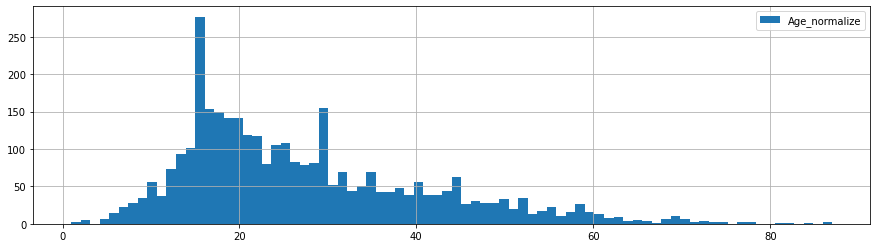

In [29]:
df.Age_normalize.hist(legend=True,bins= 80, figsize = [15,4])

## Normalizar columna Date a datetime

In [30]:
df['Datetime'] = pd.to_datetime(df['Date'], errors ='coerce')

In [31]:
df['Datetime'].count()

5458

In [32]:
df['Datetime'].nunique()

4605

In [33]:
df['Date'].nunique()

5432

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 6301
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    6301 non-null   object        
 2   Year                    6299 non-null   float64       
 3   Type                    6297 non-null   object        
 4   Country                 6251 non-null   object        
 5   Area                    5846 non-null   object        
 6   Location                5761 non-null   object        
 7   Activity                5757 non-null   object        
 8   Name                    6091 non-null   object        
 9   Sex                     5736 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6273 non-null   object        
 12  Fatal (Y/N)             5762 non-null   object  

In [35]:
df[["Year","Datetime"]].sample(10)

,Year,Datetime
2888,1984.0,1984-07-24
1256,2008.0,2008-05-24
819,2012.0,2012-02-06
5823,1880.0,1880-01-22
2499,1993.0,1993-04-01
1288,2008.0,NaT
214,2016.0,2016-09-18
1911,2001.0,2001-08-31
2732,1988.0,1988-06-01
2692,1989.0,1989-02-19


In [47]:
df.iloc[2888]["Datetime"].year

1984

In [37]:
df.count()

Case Number               6301
Date                      6301
Year                      6299
Type                      6297
Country                   6251
Area                      5846
Location                  5761
Activity                  5757
Name                      6091
Sex                       5736
Age                       3471
Injury                    6273
Fatal (Y/N)               5762
Time                      2948
Species                   3464
Investigator or Source    6284
original order            6301
Age_normalize             3369
Datetime                  5458
dtype: int64

In [38]:
df.dtypes

Case Number                       object
Date                              object
Year                             float64
Type                              object
Country                           object
Area                              object
Location                          object
Activity                          object
Name                              object
Sex                               object
Age                               object
Injury                            object
Fatal (Y/N)                       object
Time                              object
Species                           object
Investigator or Source            object
original order                   float64
Age_normalize                    float64
Datetime                  datetime64[ns]
dtype: object

In [39]:
df.isnull().sum()

Case Number                  0
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2830
Injury                      28
Fatal (Y/N)                539
Time                      3353
Species                   2837
Investigator or Source      17
original order               0
Age_normalize             2932
Datetime                   843
dtype: int64

In [51]:
def year_to_int(x):
    try:
        z = str(x).split(".")
        return (int(z[0]))
    except:
        pass
        

In [52]:
df["borr"] = df.Year.apply(year_to_int)

def feet2cm(x):
    (f,i) = x.split('-')
    return 30.48 * int(f) + 2.54 * int(i)

nba['altura_cm'] = nba.Height.apply(feet2cm)

In [58]:

df['año'] = pd.to_datetime(df["borr"],format="%Y", errors ='coerce')

In [59]:
df['año'].dtypes

dtype('<M8[ns]')

In [61]:
df['año'].samples(30)

AttributeError: 'Series' object has no attribute 'samples'

In [56]:
# df['año'].isnull().sum()

In [63]:
df["borr"].isnull().sum()
df["año"].isnull().sum()

140

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 6301
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    6301 non-null   object        
 2   Year                    6299 non-null   float64       
 3   Type                    6297 non-null   object        
 4   Country                 6251 non-null   object        
 5   Area                    5846 non-null   object        
 6   Location                5761 non-null   object        
 7   Activity                5757 non-null   object        
 8   Name                    6091 non-null   object        
 9   Sex                     5736 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6273 non-null   object        
 12  Fatal (Y/N)             5762 non-null   object  